In [0]:
# перезагрузить ноутбук
!kill -9 -1

In [1]:
#файлы и папки необходимые для проекта лежат здесь: 
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 341 (delta 64), reused 55 (delta 16), pack-reused 215
Receiving objects: 100% (341/341), 5.06 MiB | 18.10 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
!pip install soundfile

In [3]:
!pip install pydub

In [4]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

Using TensorFlow backend.


# СТРУКТУРА ПРОЕКТА

Проект состоит из трех крупных частей:
1. Запись слов с микрофона, их обработка и генерирование фраз из этих слов.
2. Обратная задача - разделение фразы на отдельные слова. Обработка полученных результатов для дальнейшей идентификации.
3. Применение нейронной сети для идентификации отдельных выделенных из фразы слов.

В конце описания приводятся ссылки на использованные в работе материалы. 

# ЧАСТЬ 1. ЗАПИСЬ С МИКРОФОНА. ОБРАБОТКА СЛОВ. ГЕНЕРИРОВАНИЕ ФРАЗ. 

# 1а. запись с микрофона. Создание звуковых файлов

На микрофон были начитаны 30 слов на английском языке: 
bed, bird, cat, dog, down, eight, five, four, go, house, happy, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, wow, yes, zero.

Запись производилась при помощи программы Scratch, как самой доступной.  Также оказалось, что Scratch записывает wav файлы в близком к нужному формате - framerate = 22050, Mono. Длина одной записи - около 1 секунды.



Необработанные аудиофайлы находятся в директории MyRawAudio.
Название файла - соответстующее ему слово.
Первые символы перед названием файла означают того, кто производил запись.  Предполагается, что записи могут быть сделаны разными людьми. 


ТАК ВЫГЛЯДИТ ЗАПИСАННОЕ СЛОВО (НЕОБРАБОТАННЫЙ АУДИОФАЙЛ):
Number of channels 1
Frame rate. 22050
Number of frames 17665
/content/Simple-Audio-Recognition/MyRawAudio/s_bird.wav
sound durantion =  0.8011337868480726


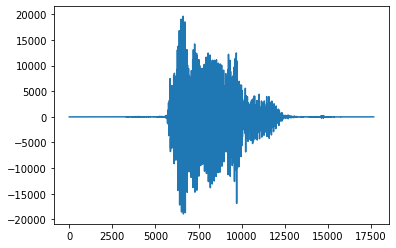

In [5]:
print("ТАК ВЫГЛЯДИТ ЗАПИСАННОЕ СЛОВО (НЕОБРАБОТАННЫЙ АУДИОФАЙЛ):")
import wave

file = '/content/Simple-Audio-Recognition/MyRawAudio/s_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

Записанное слово имеет отличные от необходимых нам характеристики: framerate = 22050, продолжительность (sound duration) <> 1 сек. 

Такой аудиофайл нужно предварительно обработать. 

# 1b. Обработка записанных слов.
Необработанные файлы в MyRaqAudio имеют продолжительность около 1 сек.
Укорачиваем их до 1 секунды. Выставляем framerate=16000, соответственно меняется number of frames.


ТАК ВЫГЛЯДИТ ОБРАБОТАННЫЙ АУДИОФАЙЛ:
Number of channels 1
Frame rate. 16000
Number of frames 16000
/content/Simple-Audio-Recognition/MyRawAudio/My_Others/mod_s_bird.wav
sound durantion =  1.0


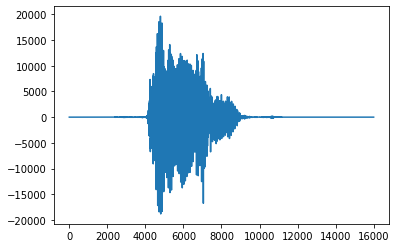

In [6]:
print("ТАК ВЫГЛЯДИТ ОБРАБОТАННЫЙ АУДИОФАЙЛ:")
import wave

file = '/content/Simple-Audio-Recognition/MyRawAudio/My_Others/mod_s_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

Подготовленные файлы хранятся в директории MyRawAudio в двух отдельных папках. 

В папке My_commands хранятся десять слов - команд: 
 "yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go". 

В папке My_others хранятся оставшиеся 20 слов.





# 1c.Генерирование аудиопотока или "фразы" 

Из отдельных слов создаем фразу.
Для этого:
1. Берем в произвольном порядке 1 слово из директория My_commands.

2. Берем в произвольном порядке 2 слова из директория My_others.

3. Соединяем в произвольном порядке выбранные слова.

4. Файл полученный в результате записываем в директорий Audio_streams

**Для генерирования фразы используем ноутбук "Генерирование_фраз.ipynb".**



ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИОПОТОК:
Number of channels 1
Frame rate. 16000
Number of frames 40150
/content/Simple-Audio-Recognition/Audio_streams/no_bed_bird.wav
sound durantion =  2.509375


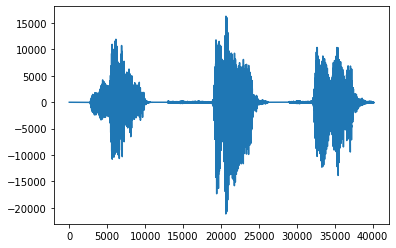

In [7]:
print("ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИОПОТОК:")
import wave

file = '/content/Simple-Audio-Recognition/Audio_streams/no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

Аудио потоки или фразы сохраняются в директории Audio_streams.

Название файла формируется из слов, составляющих фразу. 
Например, tree_go_zero.wav или no_bed_bird.wav






---



# ЧАСТЬ 2. ВЫДЕЛЕНИЕ СЛОВ ИЗ ФРАЗЫ. ОБРАБОТКА ВЫДЕЛЕННЫХ СЛОВ.

# 2a. Обратная задача - выделение отдельных слов из фразы.

Первоначально, для выделения отдельных слов планировалось применить иерархический алгоритм кластерного анализа (single-linkage clustering).

Результаты работы таких алгоритмов обычно представляются в виде графа, называемого дендрограммой. Для выделения кластеров её обрезают как виноградную кисть на определённом пороговом уровне. 

Была идея воспользуемся готовым решением библиотеки sciPy и также своими наработками (см.https://github.com/smartsinovich/Single-link-clustering).

Однако применить алгоритм непосредственно к аудиопотокам не получилось. 
Главным недостатком single-linkage clustering является то, что большое количесвто данных долго обрабатывается. При попытке применить его "в лоб" Colab ругался и выдавал ошибку. Поэтому было решено радикально уменьшать количетво данных аудиопотока.

В дальнейшем от иерархического алгоритма пришлось отказаться, т.к. было непонятно как определять количество слов в незнакомой фразе и как соответственно разрезать "грозди".

Для фраз с разным количеством слов, разной амплитудой, и разной длиной "тишины" между словами метод single-linkage clustering оказался непрактичным. 

Был примен другой метод - определение участка тишины в аудиопотоке и его разрезание с центре "тишины".

Все расчеты по определению координат точек разреза производятся на упрощенной модели аудиопотока. 

**На этом этапе проекта использутся ноутбук "Разделение_аудиопотока.ipynb".**


# 2b. Преобразование аудиопотока для уменьшения кол-ва данных

Очевидным решением для уменьшения количества расчетных данных является уменьшение параметра framerate для аудиофайла. 

Уменьшим количество точек в 400 раз с 16000 до 40.

**Операция выполняется при помощи ноутбука "Фразы_Audio_Preparation.ipynb"**


ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИОПОТОК:
Number of channels 1
Frame rate. 16000
Number of frames 40150
/content/Simple-Audio-Recognition/Audio_streams/no_bed_bird.wav
sound durantion =  2.509375


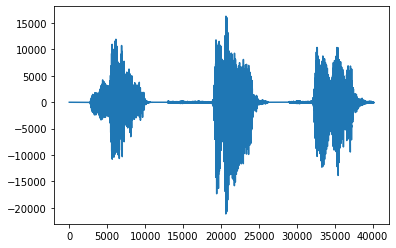

In [8]:
print("ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИОПОТОК:")
import wave

file = '/content/Simple-Audio-Recognition/Audio_streams/no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

ТАК ВЫГЛЯДИТ АУДИОПОТОК ПОСЛЕ УМЕНЬШЕНИЯ КОЛ-ВА ДАННЫХ:
Number of channels 1
Frame rate. 40
Number of frames 120
/content/Simple-Audio-Recognition/Seg_audio_streams/seg_no_bed_bird.wav
sound durantion =  3.0


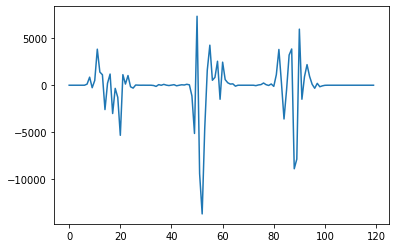

In [9]:
print("ТАК ВЫГЛЯДИТ АУДИОПОТОК ПОСЛЕ УМЕНЬШЕНИЯ КОЛ-ВА ДАННЫХ:")
import wave

file = '/content/Simple-Audio-Recognition/Seg_audio_streams/seg_no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

Новый файл получает приставку "seg" к названию и хранится в директории Seg_audio_streams.




# 2с. Обработка упрощенного аудиопотка

Далее следует череда преобразований массива данных для упрощенного аудиопотока, в результате которых определяются периоды тишины между словами и координаты их центра.

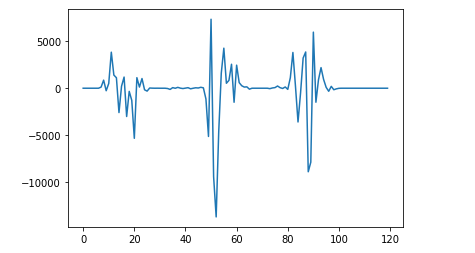

In [10]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure7.png")

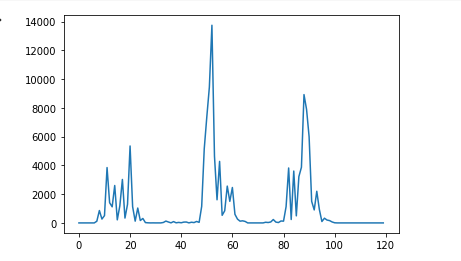

In [11]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure8.png")

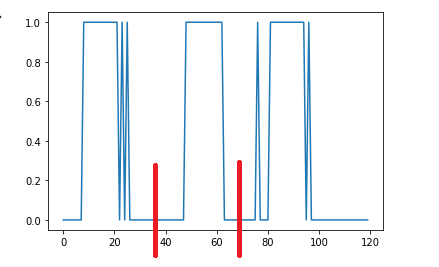

In [12]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure9.png")

Переносим координаты разрезов на упрощенный аудиопоток - получаем три отдельных слова.

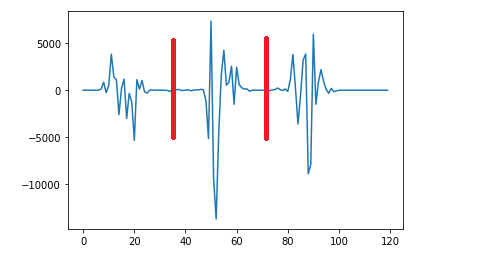

In [13]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure10.png")

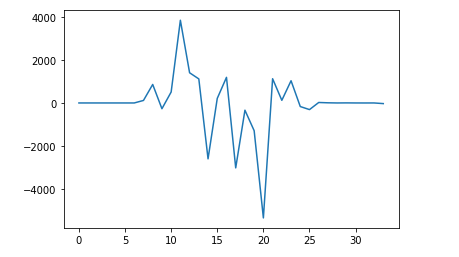

In [14]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure11.png")

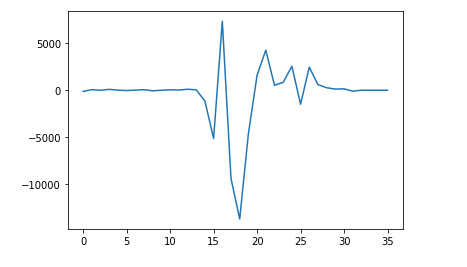

In [15]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure12.png")

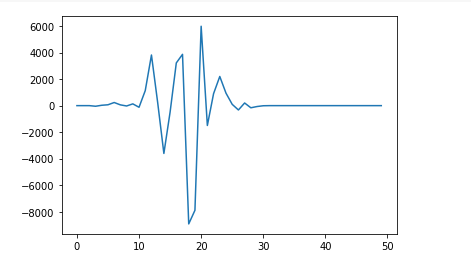

In [16]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure13.png")

# 1d. Разделение аудиопотока (фразы) на отдельные слова

Переносим точки разрыва на полноценный аудиопоток

Директорий оригинальных аудиопотоков: /content/Simple-Audio-Recognition/Audio_streams/

Применяя координаты точек разреза для оригинального аудиопотока, получаем три отдельных слова:

1_no_bed_bird.wav
2_no_bed_bird.wav
3_no_bed_bird.wav



ТАК ВЫГЛЯДИТ ПЕРВОЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:
Number of channels 1
Frame rate. 16000
Number of frames 16000
/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/1_no_bed_bird.wav
sound durantion =  1.0


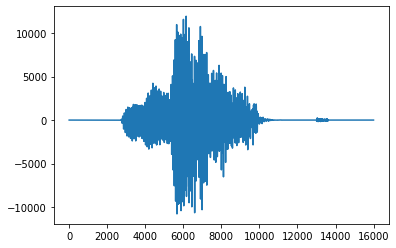

In [17]:
print("ТАК ВЫГЛЯДИТ ПЕРВОЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:")
import wave

file = '/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/1_no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

ТАК ВЫГЛЯДИТ ВТОРОЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:
Number of channels 1
Frame rate. 16000
Number of frames 16000
/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/2_no_bed_bird.wav
sound durantion =  1.0


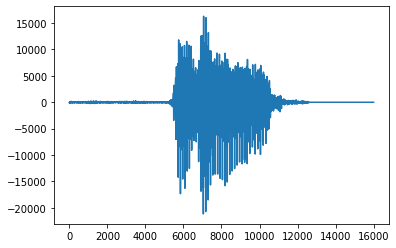

In [18]:
print("ТАК ВЫГЛЯДИТ ВТОРОЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:")
import wave

file = '/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/2_no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

ТАК ВЫГЛЯДИТ ТРЕТЬЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:
Number of channels 1
Frame rate. 16000
Number of frames 12144
/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/3_no_bed_bird.wav
sound durantion =  0.759


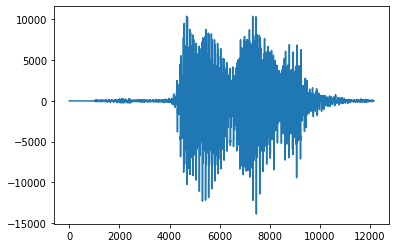

In [19]:
print("ТАК ВЫГЛЯДИТ ТРЕТЬЕ СЛОВО РАЗДЕЛЕННОЙ ФРАЗЫ:")
import wave

file = '/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/3_no_bed_bird.wav'
obj = wave.open(file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
obj.close()
rate, data = scipy.io.wavfile.read(file)
d = obj.getnframes()/obj.getframerate()
print(file)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

Поскольку при разрезании оригинальной фразы длина отдельный слов может быть  отличной от 1 сек., придется полученные файлы заново обработать. 

**Обработка файлов производится ноутбуком "Модель_Audio_Preparation.ipynb"**

Этот ноутбук создает для обработанных файлов новый субдиректорий ML+"название фразы" в директории /content/Simple-Audio-Recognition/Words_from_streams. 



Эти слова будут скармливаться модели. 
Выделенные из потока слова находятся в директории: /Words_from_streams, в поддиректории с названием потока /no_bed_bird/

Пример пути для второго слова из фразы: 
/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/2_no_bed_bird.wav



---



# ЧАСТЬ 3. ПРИМЕНЕНИЕ НЕЙРОННОЙ СЕТИ ДЛЯ ИДЕНТИФИКАЦИИ ВЫДЕЛЕННЫХ ИЗ ФРАЗЫ СЛОВ.


# 3a. Обработка звука для нейронной сети. MFCC и MEL-спектрограмма

Звук можно обрабатывать разными методами, например используя Linear Prediction Coefficients (LPCs) или Linear Prediction Cepstral Coefficients (LPCCs).  

В нашем случае мы используем Mel Frequency Cepstral Coefficents (MFCC) и MEL-спектрограмму.  

Метод MFCC впервые был получен Дэвисом и Мермелштейном в 80-х годах прошлого века.  С тех пор он остается основным методом для преобразования человеческой речи.





# Получение матрицы MFCC:

1. Разрезаем аудио сигнал на мелкие кусочки, взятые с перехлестом.
2. Каждый кусочук домножается на некоторую оконную функцию, после чего к ним применяется преобразование Фурье. 
3. Результатом применения оконного преобразования является матрица, где каждый столбец является спектром короткого участка исходного сигнала

![alt text](https://s1.backends.org/img/e/7/6/5/e765420002fc430fa5c00770274d5193.png)

.

.
# MEL-спектрограмма:
Мел-спектрограмма — это обычная спектрограмма, где частота выражена не в Гц, а в мелах. Переход к мелам осуществляется с помощью применения мел-фильтров к исходной спектрограмме. Мел-фильтры представляют из себя треугольные функции, равномерно распределенные на мел-шкале.
![alt text](https://habrastorage.org/webt/z7/6m/wt/z76mwtnm2ibyv8ylo12l7nlfom8.png)

При переводе в частотную шкалы, те же самые фильтры будут выглядеть так:
![alt text](https://habrastorage.org/webt/rk/pv/h8/rkpvh80tyby8jho15nfrglm66lq.png)

Каждый столбец исходной спектрограммы скалярно умножается на каждый мел-фильтр (размещенный на частотной шкале), после чего получается вектор чисел, по размеру равный количеству фильтров. 

В результате таких преобразований значения из низких частот спектрограммы остаются практически неизменными на мел-спектре, а в высоких частотах происходит усреднение значений из более широкого диапазона. Такое представление звука больше сфокусировано на низких частотах, и меньше — на высоких.



ТАК ВЫГЛЯДИТ MEL-СПЕКТРОГРАММА ДЛЯ ФРАЗЫ:


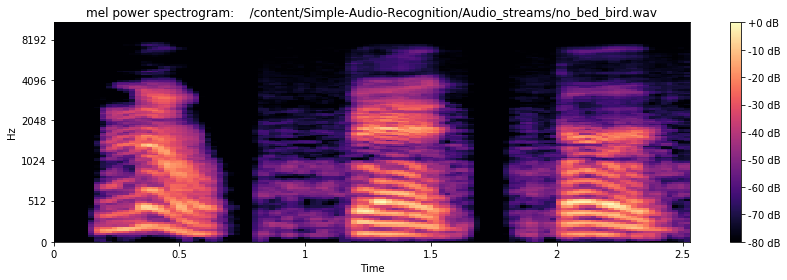

In [20]:
print("ТАК ВЫГЛЯДИТ MEL-СПЕКТРОГРАММА ДЛЯ ФРАЗЫ:")

#https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display
import librosa
import librosa.display

audio_path = '/content/Simple-Audio-Recognition/Audio_streams/no_bed_bird.wav'

y, sr = librosa.load(audio_path)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram:    ' + audio_path)
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()




Таким образом, на мел-спектрограмме сохраняется больше информации, которая хорошо воспринимается и различается человеком, чем на обычной спектрограмме. 

MFCC и MEL являются стандарными функциями, хорошо описанными, например, в пакете librosa (https://librosa.github.io/librosa/_modules/librosa/filters.html#mel)







---



# 3b. Построение модели

**1. Загрузка датасета Speech Commands dataset**

В качестве обучающей и валидационной выборки будем использовать публичный датасет Speech Commands dataset от GOOGLE, где собрано более 105 тыс. аудиофайлов, разбитых на 30 категорий.

"bed", "bird", "cat", "dog", "down", "eight", "five", "four", "go", "house", "happy", "eft", "marvin", "nine", "no", "off", "on", "one", "right", "seven", "sheila", "six", "stop", "three", "tree", "two", "up", "wow", "yes", "zero".

Отдельные слова находится здесь: https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data

Также слова выложены здесь: https://www.dropbox.com/sh/k8qxuh9zstudym3/AACWtoV-mLWSkw5APW9SeIWja?dl=0 

Здесь можно найти более подробную информацию о датасете: https://arxiv.org/abs/1804.03209


**2. Декодирование аудиофайлов**

Следующий шаг - декодирование аудиофайлов в стандартный тензор [16000, 1]


**3. Разделение датасета на обучающую, тестирующую и валидационную выборки : training, testing, validation. Выделение признаков (one-hot encoded targets).**

Из датасета нам понадобится выделить следующее:
*   Список классов (категорий)
*   Обучающий набор: список путей к коэффициентам MFCC и список правильных ответов
*   Валидационный набор: список путей к коэфф. MFCC и список правильных ответов

Директорий для testing_list, trainin_list, valuation_list: Simple-Audio-Recognition/Audio/

Датасет загруженный с Kaggle имеет два 
предобработанных списка 
training_list включает 51088 файлов.
testing_list - 6835 файлов
validation_list 6798 файлов

В качестве признаков имеем 11 типов классификации - 10 команд + отдельная категория "UNKOWN" для незнакомых слов. 
По этим признакам создаем one-hot encoded verctors.
Результы сохраняем на диске. 

В директории data - ссылка на полученные результаты
https://www.dropbox.com/sh/hkmxvam2j7b0hu9/AAALPphAbSkyl5tuLtvxIunUa?dl=0


**4. Перевод данных аудиофайлов в коэффициенты MFCC**

Для нашего проекте для вычисления коэффициентов MFCC мы используем более развернутый код, позаимствованный здесь:
http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

**5. Архитектура нейронной сети**

В качестве модели воспользуемся уже обученной нейросет с репозитория на GitHub 
https://github.com/sagardoy/Simple-Speech-Command-Algorithm/blob/master/models/model1_dr0.25_lr0.1_ra0.hdf5

Эта модель демонстрирует довольно высокое качество. Кроме того, она легко поддается анализу. 

АРХИТЕКТУРА НЕЙРОННОЙ СЕТИ:


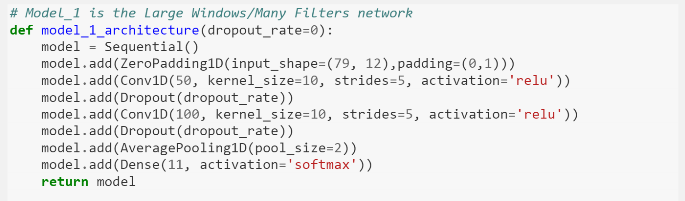

In [21]:
print("АРХИТЕКТУРА НЕЙРОННОЙ СЕТИ:")
filename = '/content/Simple-Audio-Recognition/Figures/figure_model.png'
from IPython.display import Image
Image(filename)

**6. Запуск и обучение модели. Выбор модели с лучшей classification accuracy на валидации (on validation set)**



Модель была обучена на батчах по 1000 файлов, 60 эпох чтобы покрыть большую часть из 51088 файлов.
При используемых параметрах показывает classification accuracy on validation set 82.2% 








# 3c. Тестирование модели




**Тестирование отдельного слова**

Протестируем нашу модель. Для этого:

**Воспользуемся ноутбуком "Распознавание_отдельного_слова.ipynb"**

*   Загрузим модель с обученными весами (загружено по умолчанию)
*   Загрузим предобработанный входной тестовый аудиофайл. 

Директорий /MyRawAudio/My_Commands/ для команд и директорий /MyRawAudio/My_Others/ для прочих слов.
*   Прогоним слово через нейронную сеть и получим предсказание
   







ПРЕДСКАЗАНИЕ ДЛЯ ОТДЕЛЬНОГО СЛОВА:


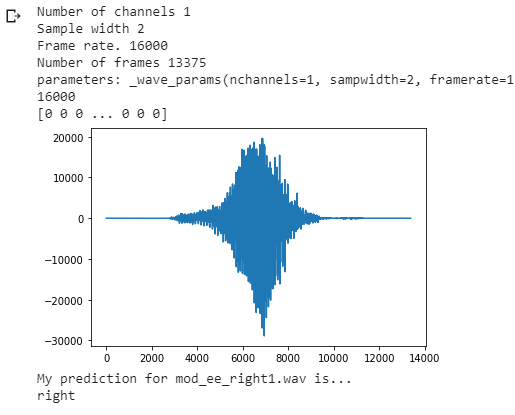

In [22]:
print("ПРЕДСКАЗАНИЕ ДЛЯ ОТДЕЛЬНОГО СЛОВА:")
filename = '/content/Simple-Audio-Recognition/Figures/figure_prediction_word.png'
from IPython.display import Image
Image(filename)

**Тестирование на фразе**

Протестируем модель на фразе. 

Для этого:


*   **Используем ноутбук "Распознавание_слов_из_фразы.ipynb"**
*   Загрузим в него путь - сгенерированный директорий с выделенными из 
аудиопотока разделенными и обработанными словами.

Директорий /content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird. Поддиректорий - по названию фразы.

dir_phrase = '/content/Simple-Audio-Recognition/Words_from_streams/ML_bed_bird_right'





ПРЕДСКАЗАНИЕ ДЛЯ ФРАЗЫ:


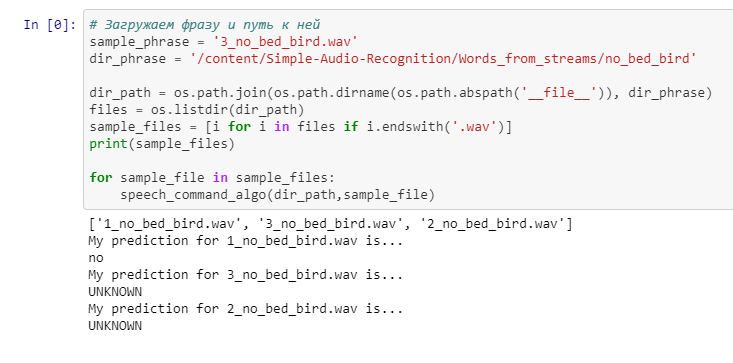

In [23]:
print("ПРЕДСКАЗАНИЕ ДЛЯ ФРАЗЫ:")
filename = '/content/Simple-Audio-Recognition/Figures/figure_prediction_phrase.png'
from IPython.display import Image
Image(filename)



---



# ВЫВОДЫ


**Выделение слов из фразы**

Разработка этого куска проекта оказалась самой долгой. Наверняка, существуют стандартные библиотеки, которые позволяют вычленять слова гораздо быстрее и точнее. 

Много времени было потрачено на неэффективный метод Single Link Clustering. 
Тем не менее была придумана простая и понятная схема, универсальная для фраз разной длины. 



**Модель**

Поскольку решалась хрестоматийная задача (определение 10 команд из 30 слов), то был смысл воспользоваться уже готовой и предобученной нейронной сетью и не сочинять чего-то нового.

Эта сеть, как и было обещено, показала достаточно высокий результат - более 80%. В нашем случае, из 10 команд ошибочно определяются две.  







ПРЕДСКАЗАНИЕ ДЛЯ ВСЕХ КОМАНД:


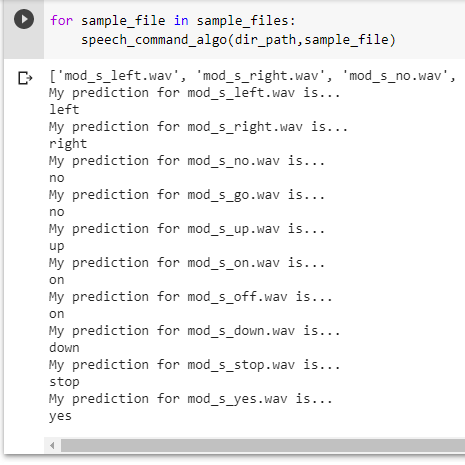

In [24]:
print("ПРЕДСКАЗАНИЕ ДЛЯ ВСЕХ КОМАНД:")
filename = '/content/Simple-Audio-Recognition/Figures/figure_prediction_list.png'
from IPython.display import Image
Image(filename)

Ошибки выдаются на созвучных словах: 

"go" (распознается как "no") и "off" (распознается как "on")


Скорее всего модель пришлось бы изменить если бы ставилась иная задача. Например, обучить распознаванию команд не на английском, а на другом языке. 

(с) "Как по-эльфийски будет "друг"? 
Mellon."   Команда распознана - ворота открылись....

Тогда в такой задаче распознавания количество классов и сами классы будут отличаться от того, которое было в исходном датасете. В таком случае нам придётся полностью выкинуть последний слой и поставить новый, с нужным количеством выходных нейронов.

**Акцент**

Было опасение, что из-за акцента слова для проекта будут записаны искаженно, и это повлияет на точность предсказаний. 
Поэтому непосредственно перед записью проводилась небольшая тренировка для голоса, с целью убрать русский акцент. 

Результат, скорее всего, был бы другим, если бы фразу не генерировали из заранее записанных слов, а записывали целиком без подготовки.  Влияние акцента в этом случае может быть очень сильным. 




---



---

